# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [8]:
from src.call import call_on_students

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [9]:
call_on_students(1)

['Leif']


In [10]:
# Code here

# (x - mu) / std
    
    



z_eight = (8 - 6) /2

z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [11]:
call_on_students(1)

['Jose']


In [12]:
from scipy import stats

In [13]:
# Code here

#cdf function
over_eight = 1 - stats.norm(loc=6, scale=2).cdf(8)
sf_8 = stats.norm(6,2).sf(8)
print(over_eight)
print(sf_8)

0.15865525393145707
0.15865525393145707


### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [14]:
call_on_students(1)

['Justin']


In [22]:
import numpy as np

In [23]:
# Code here
std= .5
mu = 5
n = 7

sterr = std / np.sqrt(n)

# ci = mu +/- z (std/sqrtn)
z_crit = stats.t.ppf(.975, df=(n-1))
ci_hi = mu + (z_crit * sterr)
ci_low = mu - (z_crit * sterr)

print(ci_low, ci_hi)


4.53757712628571 5.46242287371429


In [24]:
stats.t.interval(
    alpha=.95,
    loc=mu,
    scale=sterr,
    df=(n-1)
)

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [26]:
call_on_students(1)

['Ilan']


Interpret: 

- we are 95% confident the population mean is between low and hi


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [27]:
call_on_students(1)

['Zachary']


In [30]:
# Imports - need pandas and matplotlib

import pandas as pd

import matplotlib.pyplot as plt

In [31]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('data/auto-mpg.csv')

In [32]:
# Check the head of our data
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [33]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [35]:
# Describe the data
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

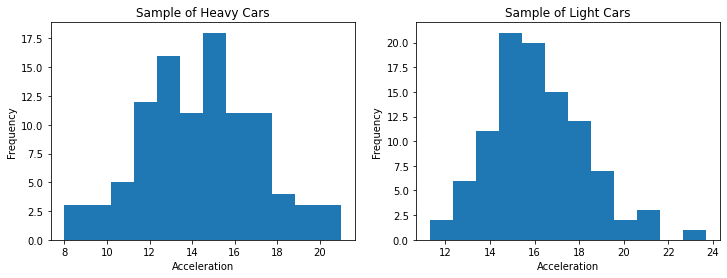

In [36]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [38]:
call_on_students(1)

['Jasmine']


**Null hypothesis:**

- Light cars are equal to or slower acceleration than heavy cars (<=)


**Alternative hypothesis:**

- Light cars accelerate faster (>)


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [39]:
call_on_students(1)

['Brandon']


**Type I Error:**

- incorrectly reject the null, when in fact, light cars = or < acceleration


**Type II Error:**

- incorrectly fail to reject the null (accept the null) when, in fact, light cars >  



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [42]:
call_on_students(1)

['Jasmine']


Description:

- two sample t-test
- one-tailed (right)


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [43]:
call_on_students(1)

['Ilan']


In [44]:
heavy_cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
239  22.0          6         146.0          97    2815          14.5   
192  22.5          6         232.0          90    3085          17.6   
26   10.0          8         307.0         200    4376          15.0   
124  20.0          6         198.0          95    3102          16.5   
262  18.1          8         302.0         139    3205          11.2   

     model year  origin         car name  
239          77       3       datsun 810  
192          76       1       amc hornet  
26           70       1        chevy c20  
124          74       1  plymouth duster  
262          78       1      ford futura

In [48]:
print(heavy_cars.acceleration.var() / light_cars.acceleration.var())

1.4630788498317422


In [54]:
heavy_cars.acceleration.var()

7.276059595959596

In [55]:
light_cars.acceleration.var()

4.973115151515151

In [57]:
#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(heavy_cars.acceleration, light_cars.acceleration)

(1.4630788498317422, 0.029866040002117344)

In [53]:
# Code here
stats.ttest_ind(heavy_cars.acceleration, light_cars.acceleration)

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2412905689208302e-06)

### 8c: Analyze your results: can you reject the null hypothesis?

In [59]:
call_on_students(1)

['Brandon']


Can you reject the null hypothesis?

- Yes, we can reject the null.

There is evidence that light cars accelerate faster than heavy cars


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

In [60]:
call_on_students(1)

['Zachary']


**1. Which probability are we trying to find?**

   - P(Dem | No)
   
   a = prob dem
   b = prob no
    
**2. Based on that, what other pieces do we need?**

   - P(D) = .6
   - P(R) = .4
   - P(N | D) = .75
   - P(N) = P(N|D)* P(D)  + P(N|R) * P(R)
    
**3. Result?**

   - 
    

In [61]:
D = .6
R = .4
N_D = .75

N = (.75 * .6) + ( .05 * .4)

In [62]:
final = (.75 * .6) / N

In [63]:
final

0.9574468085106382

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [64]:
import seaborn as sns

In [65]:
call_on_students(1)

['Jonathan']


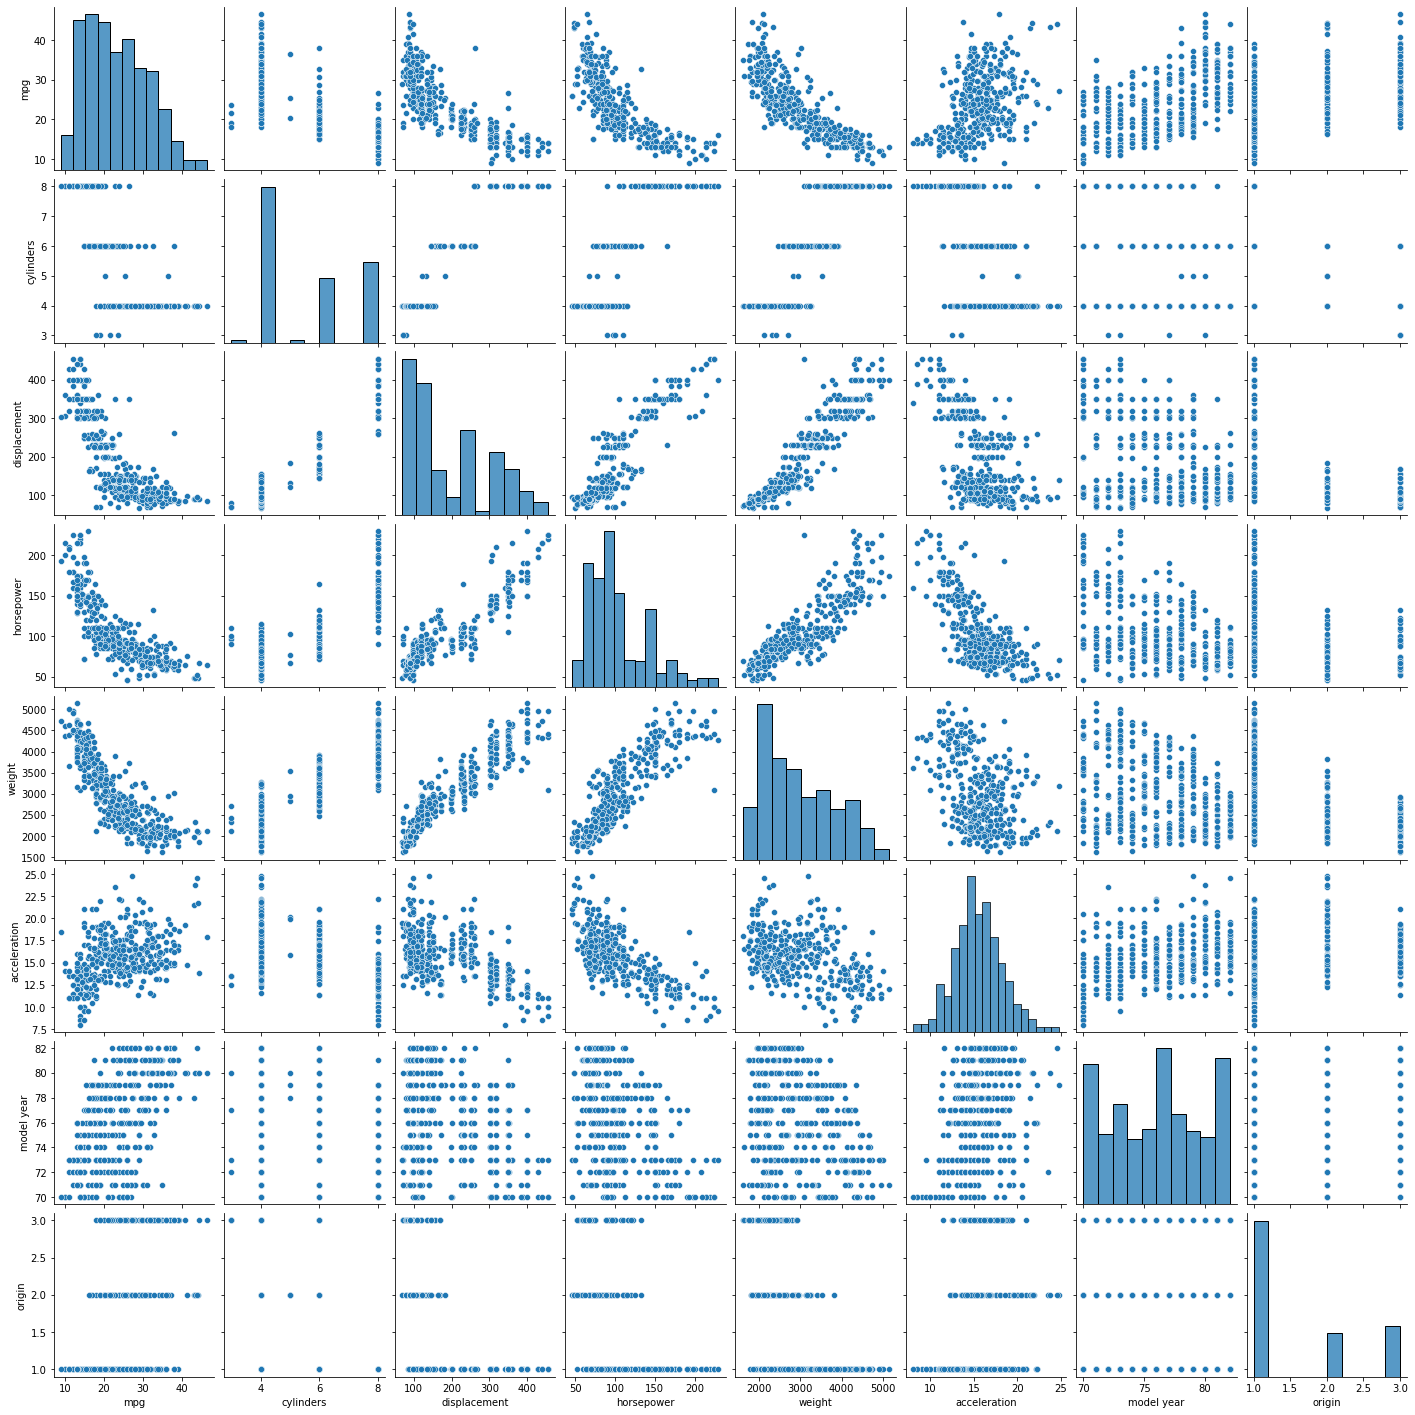

In [66]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables

sns.pairplot(df)


<AxesSubplot:>

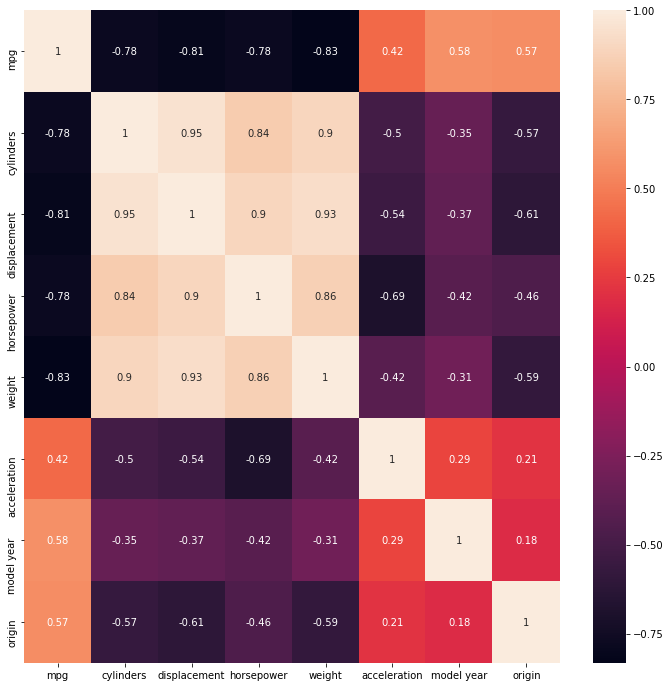

In [71]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)


### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [69]:
call_on_students(1)

['Leif']


**Observations:**

- some features are highly correlated with the target
- lots of multicolinearity
- non normal distributions
- categorical variables


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [75]:
df.corr()['mpg'].map(abs).sort_values(ascending=False)

mpg             1.000000
weight          0.832244
displacement    0.805127
horsepower      0.778427
cylinders       0.777618
model year      0.580541
origin          0.565209
acceleration    0.423329
Name: mpg, dtype: float64

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [76]:
call_on_students(1)

['Matthew']


In [81]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!

y=df.mpg
# X=df.weight
X=df[['weight']]

results = sm.OLS(y, sm.add_constant(X)).fit()

In [82]:
simple_model_summary = results.summary()

In [83]:
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          6.02e-102
Time:                        14:45:38   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [84]:
call_on_students(1)

['Jose']


There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- r^2 is okay 
- weight is statsig
- every pound of added weight reduces MPG by .0076


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [85]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [86]:
call_on_students(1)

['Nathaniel']


In [90]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 


y = df.mpg

X = df[['displacement','cylinders','acceleration']]

model = sm.OLS(y, sm.add_constant(X)).fit()


In [92]:
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          9.63e-102
Time:                        14:52:17   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [93]:
call_on_students(1)

['Justin']


Specifically, compare this model summary to your simple model's summary.

- 


- log target
- scale features
- multicolinearity
- curve the line

In [95]:
X.head(1)

displacement  horsepower  weight  acceleration
0         307.0         130    3504          12.0

In [94]:
# Log scale target
y = np.log(df.mpg)

In [143]:
X = df[['displacement','cylinders','acceleration']]

In [144]:
X['d^2'] = X.displacement**2

<ipython-input-144-566455996041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['d^2'] = X.displacement**2


In [145]:
X.head()

displacement  cylinders  acceleration       d^2
0         307.0          8          12.0   94249.0
1         350.0          8          11.5  122500.0
2         318.0          8          11.0  101124.0
3         304.0          8          12.0   92416.0
4         302.0          8          10.5   91204.0

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
ss = StandardScaler()

In [148]:
ss.fit(X)

StandardScaler()

In [149]:
X_sc = ss.transform(X)

In [150]:
from sklearn.preprocessing import OneHotEncoder

In [151]:
ohe = OneHotEncoder(drop='first')

In [152]:
ohe.fit(df[['cylinders']])

OneHotEncoder(drop='first')

In [153]:
ohe_cyl = pd.DataFrame(ohe.transform(df[['cylinders']]).todense(), columns=ohe.get_feature_names())

In [154]:
ohe_cyl.head()

x0_4  x0_5  x0_6  x0_8
0   0.0   0.0   0.0   1.0
1   0.0   0.0   0.0   1.0
2   0.0   0.0   0.0   1.0
3   0.0   0.0   0.0   1.0
4   0.0   0.0   0.0   1.0

In [155]:
X.drop('cylinders', axis=1, inplace=True)

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [156]:
X.head()

displacement  acceleration       d^2
0         307.0          12.0   94249.0
1         350.0          11.5  122500.0
2         318.0          11.0  101124.0
3         304.0          12.0   92416.0
4         302.0          10.5   91204.0

In [157]:
X = pd.concat([X,ohe_cyl], axis=1)

In [158]:
X.head()

displacement  acceleration       d^2  x0_4  x0_5  x0_6  x0_8
0         307.0          12.0   94249.0   0.0   0.0   0.0   1.0
1         350.0          11.5  122500.0   0.0   0.0   0.0   1.0
2         318.0          11.0  101124.0   0.0   0.0   0.0   1.0
3         304.0          12.0   92416.0   0.0   0.0   0.0   1.0
4         302.0          10.5   91204.0   0.0   0.0   0.0   1.0

In [159]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     182.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          7.93e-118
Time:                        15:15:37   Log-Likelihood:                 153.92
No. Observations:                 392   AIC:                            -291.8
Df Residuals:                     384   BIC:                            -260.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.3993      0.106     31.947      0.000       3.190       3.608
displacement    -0.0054      0.001     -7.593      0.000      -0.007      -0.004
acceleration    -0.0016      0.004     -0.418      0.676      -0.009       0.006
d^2           5.748e-06   1.23e-06      4.657      0.000    3.32e-06    8.18e-06
x0_4             0.5062      0.086      5.862      0.000       0.336       0.676
x0_5             0.5680      0.132      4.298      0.000       0.308       0.828
x0_6             0.5044      0.103      4.889      0.000       0.302       0.707
x0_8             0.4759      0.117      4.074      0.000       0.246       0.706
==============================================================================
Omnibus:                       20.865   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.875
Skew:                           0.269   Prob(JB):                     2.97e-10
Kurtosis:                       4.548   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""